# Requests library

Contents of this notebook are based on [this article](https://realpython.com/python-requests/)

Requests is a library allowing you to make HTTP requests.

To install it, please uncomment and run the following line:

In [2]:
# !pip install requests

If it's installed you can import it like so:

In [3]:
import requests

## HTTP for beginners

HTTP is an Internet protocol that lies on top of the [OSI model](https://en.wikipedia.org/wiki/List_of_network_protocols_(OSI_model)). It's layer has index 7 (e.g. Layer 7) and is called **Application layer**.

Two other well-known protocols of the same layer:
 * SMTP is for email
 * DNS for domain name resolution (e.g. domain.com -> IP address mapping)

HTTP is a **client-server** protocol, so (it's applicable to HTTP/1.0 to be precise):
 1. Server waits for a client's connection (corresponding port for HTTP is 80)
 1. Client connects and requests a resource
 1. Server outputs contents of the requested resource OR produces an error
 1. Server closes connection

### URI and URL

 * [URI](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier) is for Uniform Resource Identifier
 * [URL](https://en.wikipedia.org/wiki/URL) is for Uniform Resource Locator
 
Don't worry, both terms are (almost) interexchangeable.

URI is a hierarchical sequence of elements:

`scheme:[//authority]path[?query]`


 * For HTTP `scheme` is defined as "http".
 * `authority` is usually a server name resolved via DNS system, like: `github.com`
 * `path` is a location on the server
 * `query` is optional and used to specify the request
 
 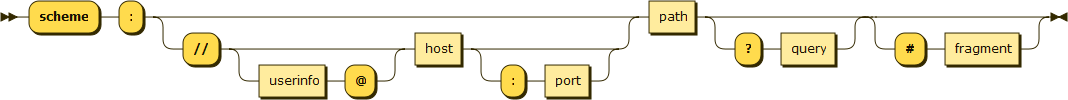

Other URL examples:
 * tg://resolve?domain=pimenoff
 * mailto:pimenoff@gmail.com
 

### HTTP at a glance

HTTP protocol defines several verbs like GET, POST, PUT, DELETE, OPTION etc to serve different purposes.

 * Most often used is **GET**, your browser usually sends it when you type-in and URL in the address bar.
 * **POST** and **PUT** are usually used to send forms

Typical workflow of HTTP request:
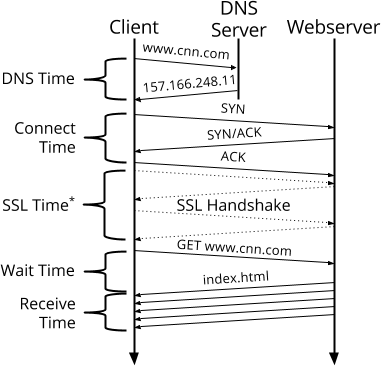

[Source article](https://blog.thousandeyes.com/measuring-performance-with-http-proxies/)

A typical request (1) -response (2) session:

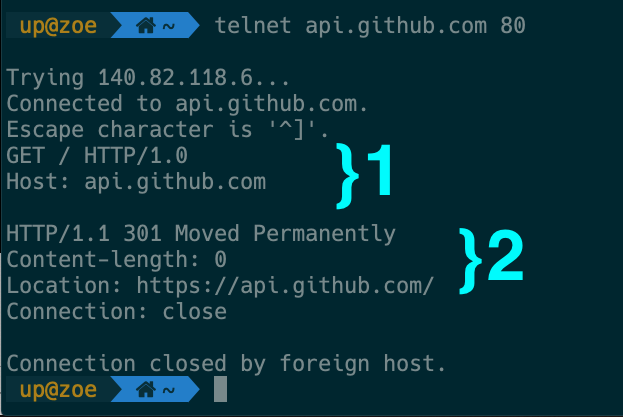

Let's take a closer look:
 * Request:
   * `GET / HTTP/1.0`, here:
     * `GET` is the **verb**
     * `/` is the requested resource (in this case it's root, another example: `/article/123.html`)
     * `HTTP/1.0` is the client's request HTTP version (in this case it's 1.0)
   * `Host: api.github.com` is a request header
 * Empty line
 * Response:
   * `HTTP/1.1 301 Moved Permanently`, here:
     * `HTTP/1.1` is the response protocol version
     * `301` is the status code
     * `Moved Permanently` is just status code description for humans
   * `Content-length: 0` is a response header telling that there's no body in the response
   * `Location: http://api.github.com/` is a header telling where requested resource is moved

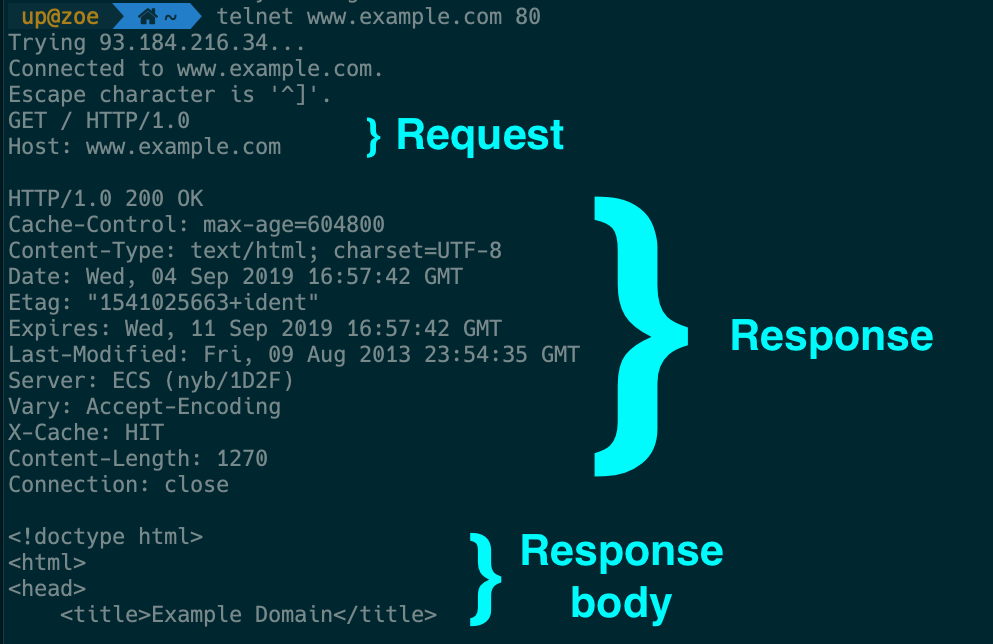

### HTTP status codes

 * 200 OK -- request succeded, see the response
 * 404 Not Found -- requested resource can't be found on the server
 * 301 and 302 -- resource is moved somewhere else (see the Location header) 
 * 403 Forbidden -- you probably need to authorize first
 * 400 Bad Request -- you did something terribly wrong
 * 500 Internal Server Error -- you crashed the server
 
[List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

## Using Requests library

In [9]:
# calling get function from the requests module
resp = requests.get('https://api.github.com')
resp

<Response [200]>

In [10]:
type(resp)

requests.models.Response

Most important thing we should worry about doing HTTP requests is the response code:

In [13]:
resp.status_code

200

In [15]:
resp404 = requests.get('https://api.github.com/no-such-page-i-swear')
resp404.status_code

404

If you like to handle exceptions instead of checking for the status code, use the `Response.raise_for_status()` method:

In [16]:
resp404.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://api.github.com/no-such-page-i-swear

Typical exception handling:

In [28]:
try:
    resp404.raise_for_status()
except requests.exceptions.HTTPError as ex:
    print "Be cool, it's just an error"

Be cool, it's just an error


When we have checked for correct status code (it should be 200 typically), we can check the response body:

In [32]:
resp.content

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","notificati

Let's check the variable type first, and it's...

In [42]:
type(resp.content)

str

However we can clearly see that content has a structure, let's examine what server told use about the returned type:

In [36]:
resp.headers.get('content-type')

'application/json; charset=utf-8'

Here `Response.headers` is just a well known dictionary, and `content-type` is a standard header (that typically can be found in any HTTP response). What is `application/json`? It's a [MIME-type](https://en.wikipedia.org/wiki/Media_type)!

### MIME (or Media) Type

It's like file extension but for Internet. For example:
 * `image/png` is for `.png`
 * `image/jpeg` is for `.jpg` or `.jpeg`
 * `text/plain` is for text files
 * `text/html` is a text file but must be treated as a HTML-page
 * `application/json` is for JSON data

### JSON

[JSON](https://en.wikipedia.org/wiki/JSON) is for JavaScript Object Notation. It's a human-readable format that is used to represent hierarchical data structures.

It looks pretty much similar to Python code. For example this string:

`{"id":1,"name":"Foo","price":123,"tags":["Bar","Eek"],"stock":{"warehouse":300,"retail":20}}`

can be directly copied-and-pasted into a Jupyter cell...

In [40]:
{"id":1,"name":"Foo","price":123,"tags":["Bar","Eek"],"stock":{"warehouse":300,"retail":20}}

{'id': 1,
 'name': 'Foo',
 'price': 123,
 'stock': {'retail': 20, 'warehouse': 300},
 'tags': ['Bar', 'Eek']}

But you don't have to copy-paste anything because `requests.Response` has a built-in method called `json()` that returns a Python's object represented by the content text.

In [44]:
j = resp.json()
j

{u'authorizations_url': u'https://api.github.com/authorizations',
 u'code_search_url': u'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 u'commit_search_url': u'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 u'current_user_authorizations_html_url': u'https://github.com/settings/connections/applications{/client_id}',
 u'current_user_repositories_url': u'https://api.github.com/user/repos{?type,page,per_page,sort}',
 u'current_user_url': u'https://api.github.com/user',
 u'emails_url': u'https://api.github.com/user/emails',
 u'emojis_url': u'https://api.github.com/emojis',
 u'events_url': u'https://api.github.com/events',
 u'feeds_url': u'https://api.github.com/feeds',
 u'followers_url': u'https://api.github.com/user/followers',
 u'following_url': u'https://api.github.com/user/following{/target}',
 u'gists_url': u'https://api.github.com/gists{/gist_id}',
 u'hub_url': u'https://api.github.com/hub',
 u'issue_search_url': u'https://api

In [49]:
type(j), j['repository_search_url']

(dict,
 u'https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}')

### Request parameters

Look at this `q=` followed by `{query}` (so "q" is for "query"). `q` is a query parameter.

In [50]:
j['repository_search_url']

u'https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}'

Documentation for this Github API request can be found [in the developer's portal](https://developer.github.com/v3/search/#search-repositories).

We can test it manually by following this link:

[https://api.github.com/search/repositories?q=requests+language:python](https://api.github.com/search/repositories?q=requests+language:python)

How do we fetch this JSON using Requests library?

Look, `requests.get()` accepts an optional `params` argument (which must be a dictionary):

In [52]:
resp_repositories = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
)

Let's examine result type:

In [53]:
resp_repositories.headers.get('content-type')

'application/json; charset=utf-8'

Because it's a JSON, we can coerce the string to a Python structure:

In [54]:
json_response = resp_repositories.json()

In [55]:
type(json_response)

dict

In [56]:
json_response.keys()

[u'total_count', u'items', u'incomplete_results']

We are interested in the value stored under `items`:

In [58]:
type(json_response['items'])

list

API designers typically do not bother to standardize JSON responses and moreover reserve the right to change the structure of the returned results as API evolves (but typically that leads to API versioning).

In [60]:
search_results = []
for item in json_response['items']:
    search_results.append(item['html_url'])
    
search_results

[u'https://github.com/psf/requests',
 u'https://github.com/spyoungtech/grequests',
 u'https://github.com/requests/requests-oauthlib',
 u'https://github.com/buildbot/buildbot',
 u'https://github.com/mvantellingen/python-zeep',
 u'https://github.com/SpiderClub/weibospider',
 u'https://github.com/getsentry/responses',
 u'https://github.com/SirVer/ultisnips',
 u'https://github.com/bulkan/robotframework-requests',
 u'https://github.com/m57/dnsteal',
 u'https://github.com/ross/requests-futures',
 u'https://github.com/requests/requests-ntlm',
 u'https://github.com/postmanlabs/httpbin',
 u'https://github.com/spulec/uncurl',
 u'https://github.com/encode/requests-async',
 u'https://github.com/patrys/httmock',
 u'https://github.com/jian-en/imooc-requests',
 u'https://github.com/cujanovic/SSRF-Testing',
 u'https://github.com/pgaref/HTTP_Request_Randomizer',
 u'https://github.com/aschn/drf-tracking',
 u'https://github.com/ionrock/cachecontrol',
 u'https://github.com/Pylons/webob',
 u'https://github

### Using other verbs

**GET** must be used to request information from web sites and web APIs. It should not modify or create anything on the requested server (that's what server programmers should worry about). [REST](https://en.wikipedia.org/wiki/Representational_state_transfer) defines GET as an idempotent request, e.g. can be called may times without distructive behaviour.

When it comes to web (REST) APIs, HTTP verbs typicaly have special meaning:
 * GET is used to request a resource or a list of resources
 * POST is used to create a new resource
 * PUT (or PATCH) is used to modify an existing resource
 * DELETE is ...

By convention, parameters for POST or PUT (actually for any verb except GET or HEAD) are passed in request body (just after request headers), thus query parameters aren't typically used. Here, we are passing parameters in the `data` argument:

In [62]:
post_response = requests.post('https://httpbin.org/post', data={'key': 'value'})

In [63]:
post_response.status_code

200

In [64]:
post_response.json()

{u'args': {},
 u'data': u'',
 u'files': {},
 u'form': {u'key': u'value'},
 u'headers': {u'Accept': u'*/*',
  u'Accept-Encoding': u'gzip, deflate',
  u'Content-Length': u'9',
  u'Content-Type': u'application/x-www-form-urlencoded',
  u'Host': u'httpbin.org',
  u'User-Agent': u'python-requests/2.21.0'},
 u'json': None,
 u'origin': u'91.105.19.243, 91.105.19.243',
 u'url': u'https://httpbin.org/post'}